In [2]:
# Installs latest version of TensorFlow 2.X 
!pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in c:\users\stephen\anaconda3\lib\site-packages (2.4.1)


In [3]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

In [4]:
# Generate dummy dataset using make_blobs.
# Use to create sample values and contains many parameters
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

In [5]:
# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

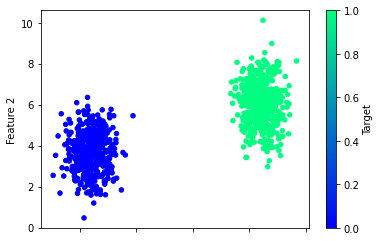

In [6]:
# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [7]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [8]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

In [9]:
# Fit the scaler
X_scaler.fit(X_train)

StandardScaler()

In [10]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
# Create the Keras Sequential model (This will store the entire architecture of our neural network model.)
nn_model = tf.keras.models.Sequential()

In [12]:
# Add our first Dense layer, including the input layer
# input_dim indicates how many inputs will be in the model.
# units indicates how many neurons we want in the hidden layer.
# activation indicates which activation function to you.  relu allows hidden layer to identify and train on nonlinear relationships
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [13]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [14]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compile the Sequential model together and customize metrics
# loss is loss metric: used to score performance of the model through iteration
# optimizer shapes and molds network so that it performs to the best of its ability.
# metric is evaluation metric (either accuracy or mse)
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 564us/step - loss: 0.1527 - accuracy: 0.9787
Epoch 2/100
24/24 [==============================] - 0s 650us/step - loss: 0.1493 - accuracy: 0.9800
Epoch 3/100
24/24 [==============================] - 0s 564us/step - loss: 0.1459 - accuracy: 0.9813
Epoch 4/100
24/24 [==============================] - 0s 607us/step - loss: 0.1426 - accuracy: 0.9827
Epoch 5/100
24/24 [==============================] - 0s 520us/step - loss: 0.1394 - accuracy: 0.9827
Epoch 6/100
24/24 [==============================] - 0s 607us/step - loss: 0.1364 - accuracy: 0.9827
Epoch 7/100
24/24 [==============================] - 0s 607us/step - loss: 0.1334 - accuracy: 0.9840
Epoch 8/100
24/24 [==============================] - 0s 520us/step - loss: 0.1304 - accuracy: 0.9853
Epoch 9/100
24/24 [==============================] - 0s 609us/step - loss: 0.1274 - accuracy: 0.9853
Epoch 10/100
24/24 [==============================] - 0s 650us/step - loss: 0.1245 - accura

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

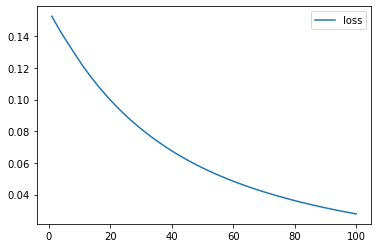

In [19]:
# Plot the loss
history_df.plot(y="loss")

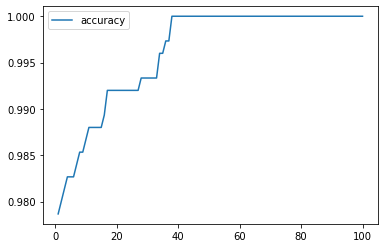

In [20]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0254 - accuracy: 1.0000
Loss: 0.025441981852054596, Accuracy: 1.0


In [22]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

In [23]:
# import make_moons which generates nonlinear moon shaped data.
from sklearn.datasets import make_moons

In [24]:
# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

In [25]:
# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

In [26]:
# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

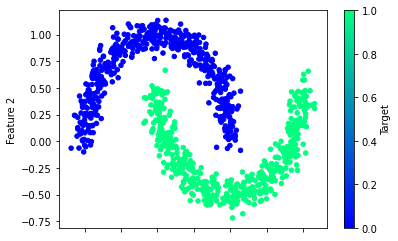

In [27]:
# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [28]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)


In [29]:
# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

In [30]:
# Fit the scaler
X_moon_scaler.fit(X_moon_train)

StandardScaler()

In [31]:
# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [32]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 781us/step - loss: 1.4018 - accuracy: 0.4533
Epoch 2/100
24/24 [==============================] - 0s 911us/step - loss: 1.1958 - accuracy: 0.4920
Epoch 3/100
24/24 [==============================] - 0s 781us/step - loss: 1.0662 - accuracy: 0.5120
Epoch 4/100
24/24 [==============================] - 0s 911us/step - loss: 0.9802 - accuracy: 0.5387
Epoch 5/100
24/24 [==============================] - 0s 867us/step - loss: 0.9117 - accuracy: 0.5600
Epoch 6/100
24/24 [==============================] - 0s 867us/step - loss: 0.8552 - accuracy: 0.5720
Epoch 7/100
24/24 [==============================] - 0s 954us/step - loss: 0.8052 - accuracy: 0.5853
Epoch 8/100
24/24 [==============================] - 0s 867us/step - loss: 0.7615 - accuracy: 0.5947
Epoch 9/100
24/24 [==============================] - 0s 911us/step - loss: 0.7204 - accuracy: 0.5987
Epoch 10/100
24/24 [==============================] - ETA: 0s - loss: 0.6989 - accuracy: 0.

In [33]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

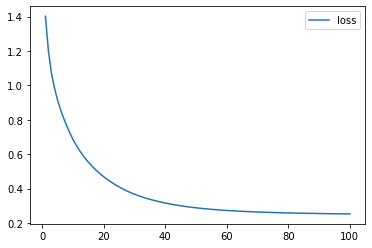

In [34]:
# Plot the loss
history_df.plot(y="loss")

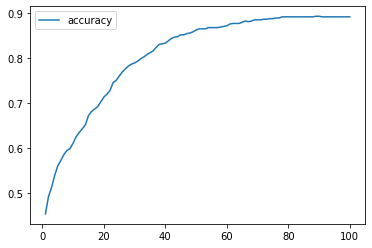

In [35]:
# Plot the loss
history_df.plot(y="accuracy")

In [36]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [39]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

In [40]:
# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [41]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [42]:
# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 564us/step - loss: 0.5790 - accuracy: 0.6382
Epoch 2/100
24/24 [==============================] - 0s 694us/step - loss: 0.5329 - accuracy: 0.6895
Epoch 3/100
24/24 [==============================] - 0s 564us/step - loss: 0.4923 - accuracy: 0.8859
Epoch 4/100
24/24 [==============================] - 0s 650us/step - loss: 0.4716 - accuracy: 0.8781
Epoch 5/100
24/24 [==============================] - 0s 650us/step - loss: 0.4639 - accuracy: 0.8839
Epoch 6/100
24/24 [==============================] - 0s 607us/step - loss: 0.4443 - accuracy: 0.8778
Epoch 7/100
24/24 [==============================] - 0s 650us/step - loss: 0.4185 - accuracy: 0.8919
Epoch 8/100
24/24 [==============================] - 0s 650us/step - loss: 0.4035 - accuracy: 0.8724
Epoch 9/100
24/24 [==============================] - 0s 650us/step - loss: 0.3979 - accuracy: 0.8619
Epoch 10/100
24/24 [==============================] - 0s 564us/step - loss: 0.3907 - accura